In [2]:
import pandas as pd
import requests, json

In [3]:
def load_data() -> pd.DataFrame:
    req = requests.get("http://localhost:8000/api/strokesgained-detail-api/")
    raw_data = json.loads(req.text)
    df = pd.DataFrame(raw_data)

    return df


def barchart_preprocessing(df: pd.DataFrame):
    # fixing the dtypes of the strokes gained columns
    sg_cols: list[str] = [i for i in df.columns if "sg" in i]
    for col in sg_cols:
        df[col] = df[col].astype("float")

    return df.groupby("name")[sg_cols].mean()

In [23]:
df = load_data()
barchart_preprocessing(df)
df.head()

,id,tournament,round,name,total,round_score,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,1,1,1,Wyndham Clark,-10,0.0,1.79,1.20,-0.14,1.41,2.47,4.26
1,2,1,1,Rory Mcilroy,-9,0.0,0.40,0.27,1.21,2.13,3.61,4.01
2,3,1,1,Scottie Scheffler,-7,0.0,0.29,0.56,1.62,1.04,3.22,3.51
3,4,1,1,Cameron Smith,-6,-3.0,1.96,-0.04,1.12,0.23,1.30,3.26
4,5,1,1,Tommy Fleetwood,-5,-7.0,-0.29,0.59,1.80,0.92,3.30,3.01


In [24]:
player = "Aaron Baddeley"
sg_cols = [col for col in df.columns if "sg" in col]
ab = df.query("name == '{}'".format(player))

<Axes: xlabel='round'>

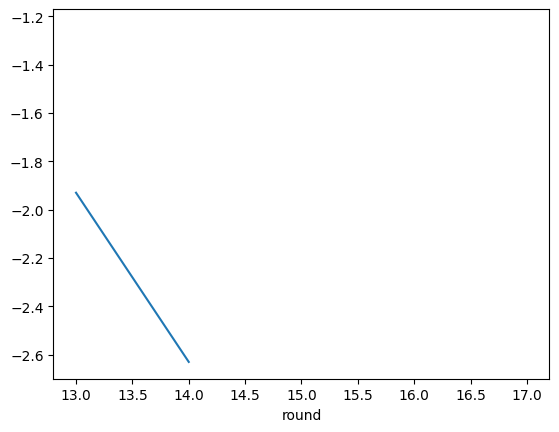

In [28]:
ab.groupby("round")["sg_total"].mean()